In [122]:
from hossam import load_data
from pandas import DataFrame, get_dummies
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

In [123]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [124]:
origin=load_data('graduate')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab12_/graduate.xlsx
[desc] 방사선학 석사과정 대학원생 모집 현황을 조사한 가상의 데이터
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (400, 4)
행 개수 : 400개
열 개수 : 4개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   합격여부    400 non-null    int64  
 1   필기점수    400 non-null    int64  
 2   학부성적    400 non-null    float64
 3   병원경력    400 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB
None


,합격여부,필기점수,학부성적,병원경력
0,0,380,3.61,1~5년
1,1,660,3.67,1~5년
2,1,800,4.00,10년 이상
3,1,640,3.19,1년 미만
4,0,520,2.93,1년 미만


In [125]:
origin['병원경력'].unique()

array(['1~5년', '10년 이상', '1년 미만', '5~10년'], dtype=object)

In [126]:
df=origin.copy()
df['병원경력']=df['병원경력'].map({
    '1년 미만':0, '1~5년':1, '5~10년':2, '10년 이상':3
})

df['병원경력'].unique()

array([1, 3, 0, 2])

In [127]:
df2=get_dummies(df, columns=['병원경력'], dtype='int', drop_first=True)
df2.head()

,합격여부,필기점수,학부성적,병원경력_1,병원경력_2,병원경력_3
0,0,380,3.61,1,0,0
1,1,660,3.67,1,0,0
2,1,800,4.00,0,0,1
3,1,640,3.19,0,0,0
4,0,520,2.93,0,0,0


In [128]:
yname='합격여부'

x=df2.drop(yname, axis=1)
y=df2[yname]

x_input=sm.add_constant(x)
display(x_input)

fit=sm.Logit(y, x_input).fit()
tbl1=fit.summary()
print(tbl1)

,const,필기점수,학부성적,병원경력_1,병원경력_2,병원경력_3
0,1.0,380,3.61,1,0,0
1,1.0,660,3.67,1,0,0
2,1.0,800,4.00,0,0,1
3,1.0,640,3.19,0,0,0
4,1.0,520,2.93,0,0,0
...,...,...,...,...,...,...
395,1.0,620,4.00,0,1,0
396,1.0,560,3.04,1,0,0
397,1.0,460,2.63,0,1,0
398,1.0,700,3.65,0,1,0


Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   합격여부   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Mon, 15 Dec 2025   Pseudo R-squ.:                 0.08292
Time:                        17:13:17   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5414      1.138     -4.869      0.000      -7.772      -3.311
필기점수           0.0023      0.

In [129]:
y_true=df2['합격여부']
y_true

0      0
1      1
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: 합격여부, Length: 400, dtype: int64

In [130]:
y_pred=fit.predict(x_input)
y_pred

0      0.172627
1      0.292175
2      0.738408
3      0.178385
4      0.118354
         ...   
395    0.488670
396    0.165504
397    0.181062
398    0.463667
399    0.300731
Length: 400, dtype: float64

In [131]:
y_pred_fix=y_pred>0.5
y_pred_fix

0      False
1      False
2       True
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [132]:
cm=confusion_matrix(y_true, y_pred_fix)
tn, fp, fn, tp=cm.ravel()
tn, fp, fn, tp

(np.int64(254), np.int64(19), np.int64(97), np.int64(30))

In [133]:
cmdf=DataFrame(cm, index=['Actual 0 (TN/FP)', 'Actual 1 (FN/TP)'], columns=['Predicted (Negative)', 'Predicted (Positive)'])
cmdf

,Predicted (Negative),Predicted (Positive)
Actual 0 (TN/FP),254,19
Actual 1 (FN/TP),97,30


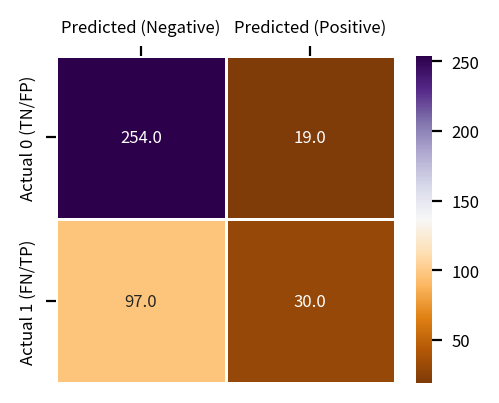

In [134]:
width_px=500
height_px=400
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.heatmap(data=cmdf, annot=True, fmt='0.1f', linewidth=0.5, cmap='PuOr')

ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.tick_top()

plt.tight_layout()
plt.show()
plt.close()

In [135]:
(tn+tp)/(tn+fp+fn+tp)

np.float64(0.71)

In [136]:
acc=accuracy_score(y_true, y_pred_fix)
acc

0.71

In [137]:
pre=precision_score(y_true, y_pred_fix)
pre

0.6122448979591837

In [138]:
recall=tp/(tp+fn)
recall=recall_score(y_true, y_pred_fix)
recall

0.23622047244094488

In [139]:
fpr=fp/(fp+tn)
fpr

np.float64(0.0695970695970696)

In [140]:
tnr=1-fpr
tnr

np.float64(0.9304029304029304)

In [141]:
f1=f1_score(y_true, y_pred_fix)
f1

0.3409090909090909

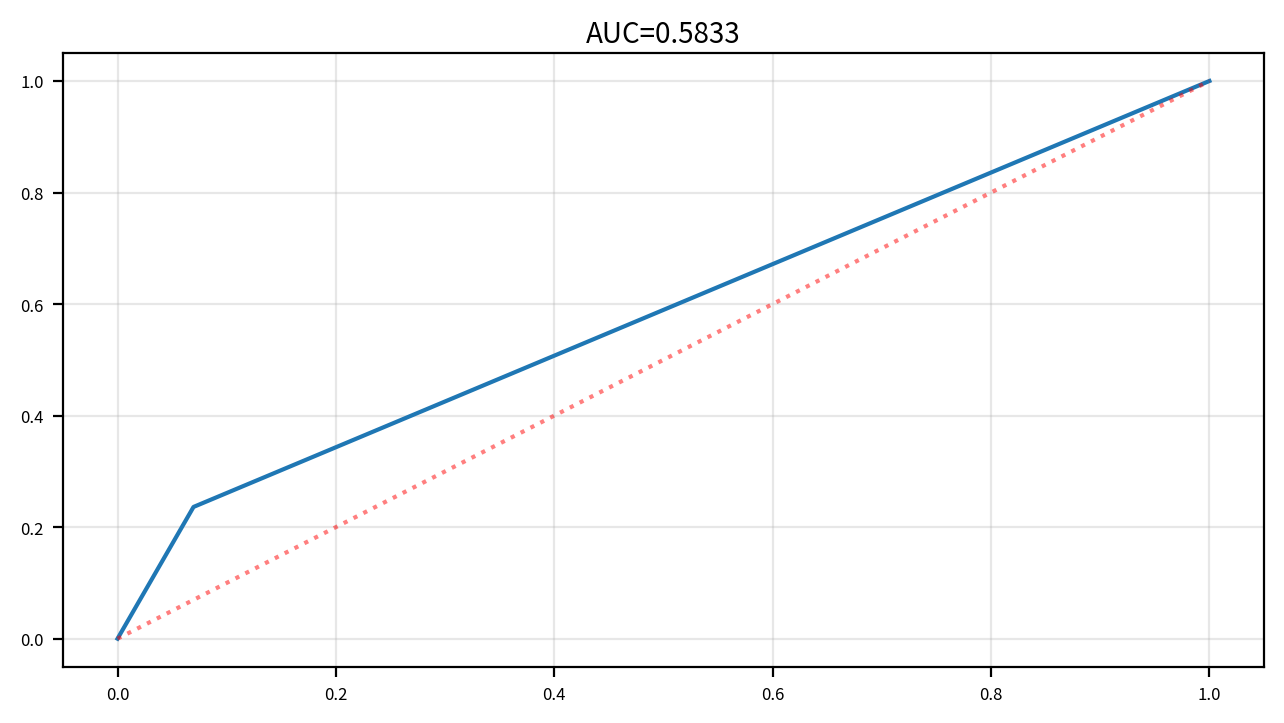

In [142]:
ras=roc_auc_score(y_true, y_pred_fix)

roc_fpr, roc_tpr, thresholds=roc_curve(y_true, y_pred_fix)

width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

sb.lineplot(x=roc_fpr, y=roc_tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)

ax.grid(True, alpha=0.3)
ax.set_title(f'AUC={ras:.4f}', fontsize=10, pad=4)

plt.tight_layout()
plt.show()
plt.close()

In [143]:
result_df=DataFrame({
    '설명력(Pseudo-Rsqe)':[fit.prsquared],
    '정확도(Accuracy)':[acc],
    '정밀도(Precision)':[pre],
    '재현율(Recall, TPR)':[recall],
    '위양성율(Fallout, FPR)':[fpr],
    '특이성(Specif city, TNR)':[tnr],
    'RAS':[ras],
    'f1_score':[f1]
})
result_df

,설명력(Pseudo-Rsqe),정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specif city, TNR)",RAS,f1_score
0,0.082922,0.71,0.612245,0.23622,0.069597,0.930403,0.583312,0.340909


In [144]:
coef=fit.params
coef

const    -5.541443
필기점수      0.002264
학부성적      0.804038
병원경력_1    0.211260
병원경력_2    0.876021
병원경력_3    1.551464
dtype: float64

In [145]:
odds_rate=np.exp(coef)
odds_rate_df=DataFrame(odds_rate, columns=['odds_rate'])
odds_rate_df

,odds_rate
const,0.003921
필기점수,1.002267
학부성적,2.234545
병원경력_1,1.235233
병원경력_2,2.401325
병원경력_3,4.718371


In [146]:
odds_ratio=(tp*tn)/(fp*fn)
odds_ratio

np.float64(4.134563212154097)

In [147]:
myinput='480,4.3,0,0,1'
myinput=myinput.split(',')
x_new=DataFrame([{
    '필기점수':int(myinput[0].strip()),
    '학부성적':float(myinput[1].strip()),
    '병원경력_1':int(myinput[2].strip()),
    '병원경력_2':int(myinput[3].strip()),
    '병원경력_3':int(myinput[4].strip())
}])

x_new_input=sm.add_constant(x_new, has_constant='add')

myresult=fit.predict(x_new_input)
myresult

0    0.635134
dtype: float64

In [148]:
'당신의 합격 확률은 {0:0.2f}% 입니다.'.format(myresult[0]*100)

'당신의 합격 확률은 63.51% 입니다.'

In [149]:
'합격' if myresult[0]>0.5 else '불합격'

'합격'

In [150]:
x

,필기점수,학부성적,병원경력_1,병원경력_2,병원경력_3
0,380,3.61,1,0,0
1,660,3.67,1,0,0
2,800,4.00,0,0,1
3,640,3.19,0,0,0
4,520,2.93,0,0,0
...,...,...,...,...,...
395,620,4.00,0,1,0
396,560,3.04,1,0,0
397,460,2.63,0,1,0
398,700,3.65,0,1,0


In [151]:
len(x.columns)

5

데이터 전처리
병원경력_0 = 1~5년
병원경력_1 = 10년 이상
병원경력_2 = 1년 미만
병원경력_3 = 5~10년
로지스틱 회귀 분석


,const,필기점수,학부성적,병원경력_1,병원경력_2,병원경력_3
0,1.0,380,3.61,0,0,0
1,1.0,660,3.67,0,0,0
2,1.0,800,4.00,1,0,0
3,1.0,640,3.19,0,1,0
4,1.0,520,2.93,0,1,0
...,...,...,...,...,...,...
395,1.0,620,4.00,0,0,1
396,1.0,560,3.04,0,0,0
397,1.0,460,2.63,0,0,1
398,1.0,700,3.65,0,0,1


Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   합격여부   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Mon, 15 Dec 2025   Pseudo R-squ.:                 0.08292
Time:                        17:13:46   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3302      1.150     -4.637      0.000      -7.583      -3.077
필기점수           0.0023      0.

,Predicted (Negative),Predicted (Positive)
Actual 0 (TN/FP),254,19
Actual 1 (FN/TP),97,30


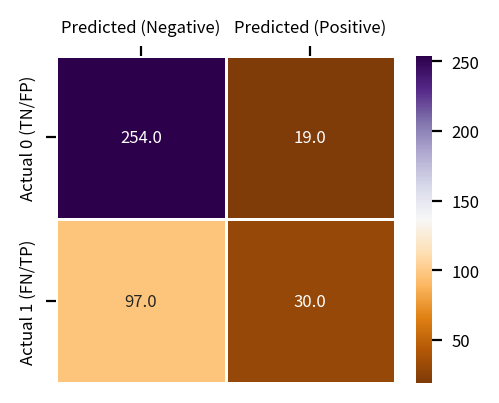

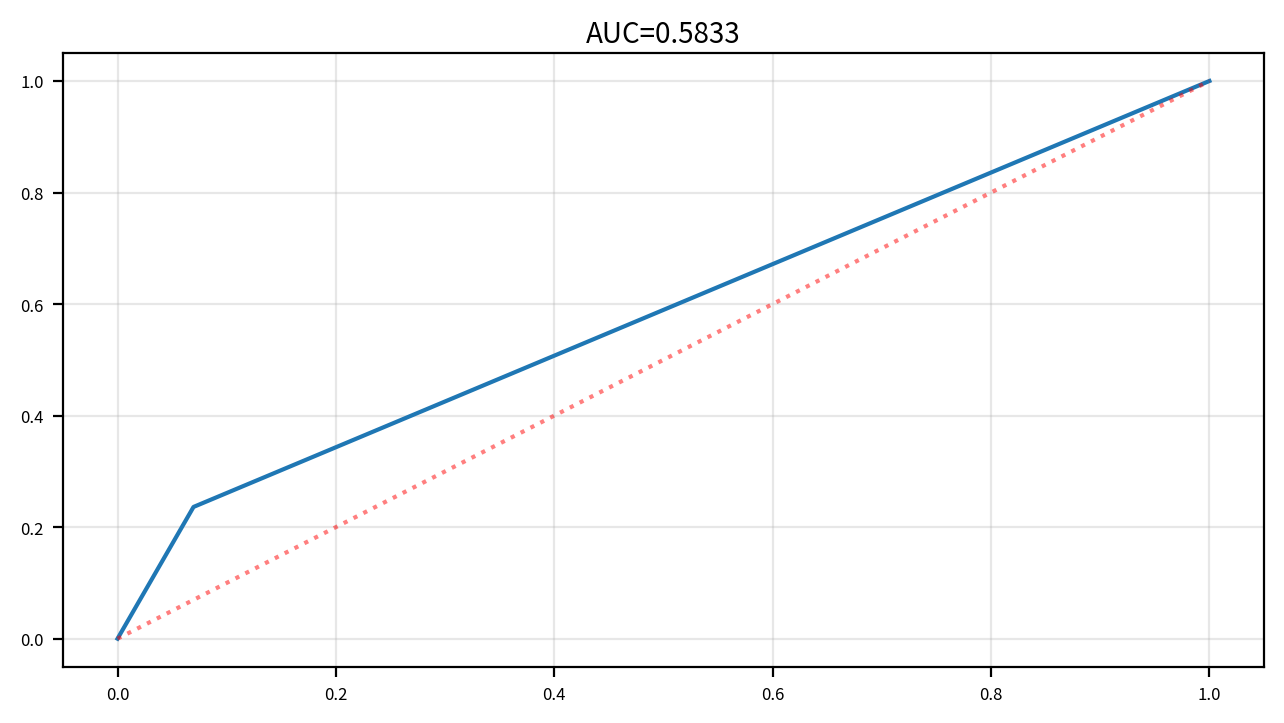

AUC (Area Under Curve)


,설명력(Pseudo-Rsqe),정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specif city, TNR)",RAS,f1_score
0,0.082922,0.71,0.612245,0.23622,0.069597,0.930403,0.583312,0.340909


Odds Ratio


,odds_rate
const,0.004843
필기점수,1.002267
학부성적,2.234545
병원경력_1,3.819822
병원경력_2,0.809564
병원경력_3,1.944026


설명변수가 1단위 증가할 때 종속변수가 1이 될 오즈는 약 4.13배 증가한다.
데이터 예측
0    0.635134
dtype: float64


In [ ]:
# 패키지 참조
from pandas import DataFrame, get_dummies
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

# 데이터 입력
yname='합격여부'          # 범주형 종속 변수 (합/불 등)
df2=origin.copy()

# 데이터 전처리             # 필요 시 사용
print('='*50)
print('데이터 전처리')
print('='*50)
mydata='병원경력'              # 명목형 변수 전처리
df2=origin.copy()
new_dict={}
my_unique=df2[mydata].unique()
for i, v in enumerate(my_unique):
    new_dict.update({v:i})
    print(f'{mydata}_{i} = {v}')
df2[mydata]=df2[mydata].map(new_dict)
df2=get_dummies(df2, columns=[mydata], dtype='int', drop_first=True)

# 그래프 초기화
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

# 로지스틱 회귀 분석
print('='*50)
print('로지스틱 회귀 분석')
print('='*50)
x=df2.drop(yname, axis=1)
y=df2[yname]
x_input=sm.add_constant(x)
display(x_input)
fit=sm.Logit(y, x_input).fit()
tbl1=fit.summary()
print(tbl1)

# 혼동행렬
print('='*50)
print('혼동행렬')
print('='*50)
y_true=df2[yname]
y_pred=fit.predict(x_input)
y_pred_fix=y_pred>0.5
cm=confusion_matrix(y_true, y_pred_fix)
tn, fp, fn, tp=cm.ravel()
cmdf=DataFrame(cm, index=['Actual 0 (TN/FP)', 'Actual 1 (FN/TP)'], columns=['Predicted (Negative)', 'Predicted (Positive)'])
display(cmdf)

# 혼동행렬 히트맵
width_px=500
height_px=400
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.heatmap(data=cmdf, annot=True, fmt='0.1f', linewidth=0.5, cmap='PuOr')
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.tick_top()
plt.tight_layout()
plt.show()
plt.close()

# ROC Curve
ras=roc_auc_score(y_true, y_pred_fix)
roc_fpr, roc_tpr, thresholds=roc_curve(y_true, y_pred_fix)
width_px=1280
height_px=720
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
sb.lineplot(x=roc_fpr, y=roc_tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
ax.grid(True, alpha=0.3)
ax.set_title(f'AUC={ras:.4f}', fontsize=10, pad=4)
plt.tight_layout()
plt.show()
plt.close()

# AUC
print('='*50)
print('AUC (Area Under Curve)')
print('='*50)
result_df=DataFrame({
    '설명력(Pseudo-Rsqe)':[fit.prsquared],
    '정확도(Accuracy)':[accuracy_score(y_true, y_pred_fix)],
    '정밀도(Precision)':[precision_score(y_true, y_pred_fix)],
    '재현율(Recall, TPR)':[recall_score(y_true, y_pred_fix)],
    '위양성율(Fallout, FPR)':[fp/(fp+tn)],
    '특이성(Specif city, TNR)':[1-fp/(fp+tn)],
    'RAS':[ras],
    'f1_score':[f1_score(y_true, y_pred_fix)]
})
display(result_df)

# 오즈비 계산
print('='*50)
print('Odds Ratio')
print('='*50)
coef=fit.params
odds_rate=np.exp(coef)
odds_rate_df=DataFrame(odds_rate, columns=['odds_rate'])
display(odds_rate_df)
odds_ratio=(tp*tn)/(fp*fn)
print(f'설명변수가 1단위 증가할 때 종속변수가 1이 될 오즈는 약 {odds_ratio:.2f}배 증가한다.')

# 데이터 입력을 통한 예측 (필요시 사용)
print('='*50)
print('데이터 예측')
print('='*50)
myinput=[]
for i, v in enumerate(x.columns):
    myinput.append(input(f'{x.columns[i]}를(을) 입력해주세요.'))
mydict={}
for i in range(0,len(x.columns)):
    mydict.update({x.columns[i]:float(myinput[i].strip())})
x_new=DataFrame([mydict])
x_new_input=sm.add_constant(x_new, has_constant='add')
myresult=fit.predict(x_new_input)
print(myresult)